### Stochastic gradient descent vs. gradient descent

+ Here, we consider two cases: linear regression and logistic regression

### Well-conditioned linear regression

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la
from scipy.sparse.linalg import svds, eigs
import math

p = 1000  # Ambient dimension
n = 1000  # Number of samples

# Generate a p-dimensional zero vector
x_star = np.random.randn(p)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 2, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

# Add noise
e = np.random.randn(n)
std = 0 #1e-2
e = std * e / la.norm(e)

y = A.dot(x_star) + e

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
U,S,V = la.svd(A)
L = max(S)**2
mu = min(S)**2

2.0000000000000075


In [2]:
def GD(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

In [5]:
def SGD(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Select randomly an index
        j = np.random.randint(n, size = 50)
    
        a = A[j, :]
        a_t = a.T
        
        # Compute gradient
        grad = - a_t.dot(y[j] - a.dot(x_new))
    
        eta = 1/(i+3)
        #eta = 0.1
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list


iter# = 0, ||x_new - x_old||_2 = 0.6335211601141153
iter# = 1, ||x_new - x_old||_2 = 0.20339294524725104
iter# = 2, ||x_new - x_old||_2 = 0.1032890142740806
iter# = 3, ||x_new - x_old||_2 = 0.060878741538421204
iter# = 4, ||x_new - x_old||_2 = 0.03850129072567945
iter# = 5, ||x_new - x_old||_2 = 0.025376489889621632
iter# = 6, ||x_new - x_old||_2 = 0.017181527537407464
iter# = 7, ||x_new - x_old||_2 = 0.011850313832488078
iter# = 8, ||x_new - x_old||_2 = 0.008282528322564504
iter# = 9, ||x_new - x_old||_2 = 0.005846230905789754
iter# = 10, ||x_new - x_old||_2 = 0.004157810490304781
iter# = 11, ||x_new - x_old||_2 = 0.0029745990044333873
iter# = 12, ||x_new - x_old||_2 = 0.00213827588429691
iter# = 13, ||x_new - x_old||_2 = 0.0015431170857672105
iter# = 14, ||x_new - x_old||_2 = 0.0011172553688703509
iter# = 15, ||x_new - x_old||_2 = 0.0008111602291516406
iter# = 16, ||x_new - x_old||_2 = 0.000590322834260902
iter# = 17, ||x_new - x_old||_2 = 0.0004304901900086308
iter# = 18, ||x_new - 

iter# = 262, ||x_new - x_old||_2 = 0.0011778679378479184
iter# = 263, ||x_new - x_old||_2 = 0.0013019137247597308
iter# = 264, ||x_new - x_old||_2 = 0.0012562355403597388
iter# = 265, ||x_new - x_old||_2 = 0.0010814665098733524
iter# = 266, ||x_new - x_old||_2 = 0.001107863961096333
iter# = 267, ||x_new - x_old||_2 = 0.0013113386025131323
iter# = 268, ||x_new - x_old||_2 = 0.0012230077538474
iter# = 269, ||x_new - x_old||_2 = 0.0009490658454949936
iter# = 270, ||x_new - x_old||_2 = 0.0008969592310979081
iter# = 271, ||x_new - x_old||_2 = 0.0011767465567701929
iter# = 272, ||x_new - x_old||_2 = 0.001079146433929363
iter# = 273, ||x_new - x_old||_2 = 0.0009801394366752577
iter# = 274, ||x_new - x_old||_2 = 0.000980267800966396
iter# = 275, ||x_new - x_old||_2 = 0.0010501031930320137
iter# = 276, ||x_new - x_old||_2 = 0.001101770722904932
iter# = 277, ||x_new - x_old||_2 = 0.001042876452958291
iter# = 278, ||x_new - x_old||_2 = 0.0011084891039697914
iter# = 279, ||x_new - x_old||_2 = 0.00

iter# = 590, ||x_new - x_old||_2 = 0.0005398589905557326
iter# = 591, ||x_new - x_old||_2 = 0.0005610056121658645
iter# = 592, ||x_new - x_old||_2 = 0.0004812146906605701
iter# = 593, ||x_new - x_old||_2 = 0.00048424621642511033
iter# = 594, ||x_new - x_old||_2 = 0.0004845371306598953
iter# = 595, ||x_new - x_old||_2 = 0.0005186990709187013
iter# = 596, ||x_new - x_old||_2 = 0.0005156412329667731
iter# = 597, ||x_new - x_old||_2 = 0.000502376527745778
iter# = 598, ||x_new - x_old||_2 = 0.00043043609191931084
iter# = 599, ||x_new - x_old||_2 = 0.0003919332217378098
iter# = 600, ||x_new - x_old||_2 = 0.00036629790580510195
iter# = 601, ||x_new - x_old||_2 = 0.000535454384721681
iter# = 602, ||x_new - x_old||_2 = 0.0005510353932709052
iter# = 603, ||x_new - x_old||_2 = 0.0004844463316962032
iter# = 604, ||x_new - x_old||_2 = 0.0005516815968086866
iter# = 605, ||x_new - x_old||_2 = 0.00047750435513786054
iter# = 606, ||x_new - x_old||_2 = 0.000465254725752477
iter# = 607, ||x_new - x_old||

iter# = 965, ||x_new - x_old||_2 = 0.00028418396105214935
iter# = 966, ||x_new - x_old||_2 = 0.0003078303391054692
iter# = 967, ||x_new - x_old||_2 = 0.000322651624180736
iter# = 968, ||x_new - x_old||_2 = 0.0002507984346479423
iter# = 969, ||x_new - x_old||_2 = 0.00030447953157058824
iter# = 970, ||x_new - x_old||_2 = 0.0002944729948000367
iter# = 971, ||x_new - x_old||_2 = 0.0003381585687000062
iter# = 972, ||x_new - x_old||_2 = 0.00023196851559178355
iter# = 973, ||x_new - x_old||_2 = 0.0002616678227338495
iter# = 974, ||x_new - x_old||_2 = 0.00024311117237998982
iter# = 975, ||x_new - x_old||_2 = 0.0003074995594602204
iter# = 976, ||x_new - x_old||_2 = 0.0002863451290337182
iter# = 977, ||x_new - x_old||_2 = 0.0004461717807735939
iter# = 978, ||x_new - x_old||_2 = 0.00023140338824790253
iter# = 979, ||x_new - x_old||_2 = 0.0002555384927752773
iter# = 980, ||x_new - x_old||_2 = 0.00023230772389986834
iter# = 981, ||x_new - x_old||_2 = 0.00032524054488168927
iter# = 982, ||x_new - x_

iter# = 1348, ||x_new - x_old||_2 = 0.00020479630322544254
iter# = 1349, ||x_new - x_old||_2 = 0.0001776928881321948
iter# = 1350, ||x_new - x_old||_2 = 0.0001745500788019423
iter# = 1351, ||x_new - x_old||_2 = 0.0002078903308951908
iter# = 1352, ||x_new - x_old||_2 = 0.00018273081168884302
iter# = 1353, ||x_new - x_old||_2 = 0.00018362627170039343
iter# = 1354, ||x_new - x_old||_2 = 0.00018267300983304462
iter# = 1355, ||x_new - x_old||_2 = 0.000162140389820864
iter# = 1356, ||x_new - x_old||_2 = 0.00014055357924537621
iter# = 1357, ||x_new - x_old||_2 = 0.0001690241211485425
iter# = 1358, ||x_new - x_old||_2 = 0.00018399670586695876
iter# = 1359, ||x_new - x_old||_2 = 0.00018106541513557498
iter# = 1360, ||x_new - x_old||_2 = 0.00019406874072959193
iter# = 1361, ||x_new - x_old||_2 = 0.0001764346551041269
iter# = 1362, ||x_new - x_old||_2 = 0.00015762866156843186
iter# = 1363, ||x_new - x_old||_2 = 0.00017579646666830245
iter# = 1364, ||x_new - x_old||_2 = 0.00016695177367957758
iter

iter# = 1724, ||x_new - x_old||_2 = 0.00017832501454503286
iter# = 1725, ||x_new - x_old||_2 = 0.0001481155332070434
iter# = 1726, ||x_new - x_old||_2 = 0.00014121165608120258
iter# = 1727, ||x_new - x_old||_2 = 0.00015269480562586565
iter# = 1728, ||x_new - x_old||_2 = 0.0001459099345168116
iter# = 1729, ||x_new - x_old||_2 = 0.0001603860206001299
iter# = 1730, ||x_new - x_old||_2 = 0.00014739404067671126
iter# = 1731, ||x_new - x_old||_2 = 0.00012983169419035687
iter# = 1732, ||x_new - x_old||_2 = 0.0001432106294417007
iter# = 1733, ||x_new - x_old||_2 = 0.0001172408069366108
iter# = 1734, ||x_new - x_old||_2 = 0.00015207334569735138
iter# = 1735, ||x_new - x_old||_2 = 0.00014843523319783136
iter# = 1736, ||x_new - x_old||_2 = 0.00013470078182721153
iter# = 1737, ||x_new - x_old||_2 = 0.000168028242466093
iter# = 1738, ||x_new - x_old||_2 = 0.00012231535555578727
iter# = 1739, ||x_new - x_old||_2 = 0.00014790368467358157
iter# = 1740, ||x_new - x_old||_2 = 0.00011713445989212244
iter

iter# = 2088, ||x_new - x_old||_2 = 0.00010455550441067063
iter# = 2089, ||x_new - x_old||_2 = 0.00011362984934310509
iter# = 2090, ||x_new - x_old||_2 = 0.00016184289405973067
iter# = 2091, ||x_new - x_old||_2 = 0.00011064310272264305
iter# = 2092, ||x_new - x_old||_2 = 9.50942459178842e-05
iter# = 2093, ||x_new - x_old||_2 = 0.00010481353879735787
iter# = 2094, ||x_new - x_old||_2 = 0.0001324576401375382
iter# = 2095, ||x_new - x_old||_2 = 0.00010351679100833621
iter# = 2096, ||x_new - x_old||_2 = 0.00011562868545588315
iter# = 2097, ||x_new - x_old||_2 = 0.00012192157213771329
iter# = 2098, ||x_new - x_old||_2 = 0.00010306459960175384
iter# = 2099, ||x_new - x_old||_2 = 0.0001398950328281404
iter# = 2100, ||x_new - x_old||_2 = 0.00011166988694880182
iter# = 2101, ||x_new - x_old||_2 = 0.000124897635204497
iter# = 2102, ||x_new - x_old||_2 = 9.554651004496195e-05
iter# = 2103, ||x_new - x_old||_2 = 0.00012830657724193653
iter# = 2104, ||x_new - x_old||_2 = 0.00010781030637236179
iter

iter# = 2456, ||x_new - x_old||_2 = 0.00010590179057496393
iter# = 2457, ||x_new - x_old||_2 = 0.00010317374258823459
iter# = 2458, ||x_new - x_old||_2 = 0.00011526092974295853
iter# = 2459, ||x_new - x_old||_2 = 8.524675095653623e-05
iter# = 2460, ||x_new - x_old||_2 = 0.00011735099255334844
iter# = 2461, ||x_new - x_old||_2 = 0.00011311802363233548
iter# = 2462, ||x_new - x_old||_2 = 9.187777363953004e-05
iter# = 2463, ||x_new - x_old||_2 = 9.27620747615042e-05
iter# = 2464, ||x_new - x_old||_2 = 9.905013304718097e-05
iter# = 2465, ||x_new - x_old||_2 = 9.316795825616529e-05
iter# = 2466, ||x_new - x_old||_2 = 9.814452011694989e-05
iter# = 2467, ||x_new - x_old||_2 = 0.00011485151119163457
iter# = 2468, ||x_new - x_old||_2 = 0.0001014141949134239
iter# = 2469, ||x_new - x_old||_2 = 8.505730137128232e-05
iter# = 2470, ||x_new - x_old||_2 = 0.00011078129449443994
iter# = 2471, ||x_new - x_old||_2 = 0.0001102906618825479
iter# = 2472, ||x_new - x_old||_2 = 0.00010435745362839761
iter# =

iter# = 2826, ||x_new - x_old||_2 = 8.00653576439941e-05
iter# = 2827, ||x_new - x_old||_2 = 8.31570260142102e-05
iter# = 2828, ||x_new - x_old||_2 = 7.78135949083566e-05
iter# = 2829, ||x_new - x_old||_2 = 9.318322473529546e-05
iter# = 2830, ||x_new - x_old||_2 = 5.822481693032098e-05
iter# = 2831, ||x_new - x_old||_2 = 8.321084629200807e-05
iter# = 2832, ||x_new - x_old||_2 = 7.493939299191316e-05
iter# = 2833, ||x_new - x_old||_2 = 8.622546687582512e-05
iter# = 2834, ||x_new - x_old||_2 = 8.503778617357182e-05
iter# = 2835, ||x_new - x_old||_2 = 8.263370766567417e-05
iter# = 2836, ||x_new - x_old||_2 = 7.560080534568635e-05
iter# = 2837, ||x_new - x_old||_2 = 8.195818006906443e-05
iter# = 2838, ||x_new - x_old||_2 = 9.381582831045082e-05
iter# = 2839, ||x_new - x_old||_2 = 9.243638630818593e-05
iter# = 2840, ||x_new - x_old||_2 = 7.376997480058725e-05
iter# = 2841, ||x_new - x_old||_2 = 8.5842242717396e-05
iter# = 2842, ||x_new - x_old||_2 = 7.04302881282903e-05
iter# = 2843, ||x_ne

iter# = 3175, ||x_new - x_old||_2 = 7.99591392216379e-05
iter# = 3176, ||x_new - x_old||_2 = 8.294586317225577e-05
iter# = 3177, ||x_new - x_old||_2 = 7.927464374432206e-05
iter# = 3178, ||x_new - x_old||_2 = 8.104570364908752e-05
iter# = 3179, ||x_new - x_old||_2 = 6.972340407317753e-05
iter# = 3180, ||x_new - x_old||_2 = 7.764141476785682e-05
iter# = 3181, ||x_new - x_old||_2 = 0.00010334862906294475
iter# = 3182, ||x_new - x_old||_2 = 7.914686559318489e-05
iter# = 3183, ||x_new - x_old||_2 = 6.098651429904549e-05
iter# = 3184, ||x_new - x_old||_2 = 7.614544039666466e-05
iter# = 3185, ||x_new - x_old||_2 = 6.291463626650631e-05
iter# = 3186, ||x_new - x_old||_2 = 6.377290196934089e-05
iter# = 3187, ||x_new - x_old||_2 = 8.228849423633575e-05
iter# = 3188, ||x_new - x_old||_2 = 7.871504600976889e-05
iter# = 3189, ||x_new - x_old||_2 = 7.45655608339334e-05
iter# = 3190, ||x_new - x_old||_2 = 6.85215411410611e-05
iter# = 3191, ||x_new - x_old||_2 = 8.962859169492471e-05
iter# = 3192, ||

iter# = 3535, ||x_new - x_old||_2 = 5.644223563719967e-05
iter# = 3536, ||x_new - x_old||_2 = 7.252633214632407e-05
iter# = 3537, ||x_new - x_old||_2 = 5.975324570093518e-05
iter# = 3538, ||x_new - x_old||_2 = 7.594972738467547e-05
iter# = 3539, ||x_new - x_old||_2 = 5.856085631837545e-05
iter# = 3540, ||x_new - x_old||_2 = 7.241224670154573e-05
iter# = 3541, ||x_new - x_old||_2 = 7.399136181120222e-05
iter# = 3542, ||x_new - x_old||_2 = 4.82109094461162e-05
iter# = 3543, ||x_new - x_old||_2 = 7.00177408377718e-05
iter# = 3544, ||x_new - x_old||_2 = 6.2039405090942e-05
iter# = 3545, ||x_new - x_old||_2 = 8.341130310184383e-05
iter# = 3546, ||x_new - x_old||_2 = 6.753042219581696e-05
iter# = 3547, ||x_new - x_old||_2 = 7.590085283509459e-05
iter# = 3548, ||x_new - x_old||_2 = 5.195582140006457e-05
iter# = 3549, ||x_new - x_old||_2 = 8.84054782252177e-05
iter# = 3550, ||x_new - x_old||_2 = 5.088381632936685e-05
iter# = 3551, ||x_new - x_old||_2 = 6.637391067936807e-05
iter# = 3552, ||x_n

iter# = 3900, ||x_new - x_old||_2 = 5.943029396297902e-05
iter# = 3901, ||x_new - x_old||_2 = 6.284924950391074e-05
iter# = 3902, ||x_new - x_old||_2 = 5.828945338555227e-05
iter# = 3903, ||x_new - x_old||_2 = 5.470219500719383e-05
iter# = 3904, ||x_new - x_old||_2 = 5.806197301267031e-05
iter# = 3905, ||x_new - x_old||_2 = 4.842400681657192e-05
iter# = 3906, ||x_new - x_old||_2 = 6.72241874613447e-05
iter# = 3907, ||x_new - x_old||_2 = 5.171478277918571e-05
iter# = 3908, ||x_new - x_old||_2 = 5.4787705392893106e-05
iter# = 3909, ||x_new - x_old||_2 = 4.9111943217814527e-05
iter# = 3910, ||x_new - x_old||_2 = 7.112590686155885e-05
iter# = 3911, ||x_new - x_old||_2 = 7.205030930543795e-05
iter# = 3912, ||x_new - x_old||_2 = 5.70472892198707e-05
iter# = 3913, ||x_new - x_old||_2 = 5.149582669411563e-05
iter# = 3914, ||x_new - x_old||_2 = 5.7939378214652375e-05
iter# = 3915, ||x_new - x_old||_2 = 6.419966307854849e-05
iter# = 3916, ||x_new - x_old||_2 = 4.729389871846984e-05
iter# = 3917,

iter# = 4228, ||x_new - x_old||_2 = 4.878111808065732e-05
iter# = 4229, ||x_new - x_old||_2 = 5.794024211001695e-05
iter# = 4230, ||x_new - x_old||_2 = 4.6227896019828385e-05
iter# = 4231, ||x_new - x_old||_2 = 5.220877479410292e-05
iter# = 4232, ||x_new - x_old||_2 = 5.077117022322843e-05
iter# = 4233, ||x_new - x_old||_2 = 6.48778707095923e-05
iter# = 4234, ||x_new - x_old||_2 = 4.4693009588996407e-05
iter# = 4235, ||x_new - x_old||_2 = 6.68922528185204e-05
iter# = 4236, ||x_new - x_old||_2 = 5.7356943531824704e-05
iter# = 4237, ||x_new - x_old||_2 = 5.4211427729372435e-05
iter# = 4238, ||x_new - x_old||_2 = 5.262089400317301e-05
iter# = 4239, ||x_new - x_old||_2 = 5.40640545934415e-05
iter# = 4240, ||x_new - x_old||_2 = 7.658920468755955e-05
iter# = 4241, ||x_new - x_old||_2 = 4.476228603554002e-05
iter# = 4242, ||x_new - x_old||_2 = 5.746974365916352e-05
iter# = 4243, ||x_new - x_old||_2 = 5.405143314003598e-05
iter# = 4244, ||x_new - x_old||_2 = 4.9496668823404376e-05
iter# = 4245

iter# = 4554, ||x_new - x_old||_2 = 3.765799381566716e-05
iter# = 4555, ||x_new - x_old||_2 = 5.1759588545814884e-05
iter# = 4556, ||x_new - x_old||_2 = 3.991400977765777e-05
iter# = 4557, ||x_new - x_old||_2 = 4.856086111410132e-05
iter# = 4558, ||x_new - x_old||_2 = 4.179753217068504e-05
iter# = 4559, ||x_new - x_old||_2 = 5.0895994454650415e-05
iter# = 4560, ||x_new - x_old||_2 = 3.472004908007951e-05
iter# = 4561, ||x_new - x_old||_2 = 5.147577907968092e-05
iter# = 4562, ||x_new - x_old||_2 = 5.040451532588407e-05
iter# = 4563, ||x_new - x_old||_2 = 4.4289760763453294e-05
iter# = 4564, ||x_new - x_old||_2 = 4.808951983781137e-05
iter# = 4565, ||x_new - x_old||_2 = 6.68787706947629e-05
iter# = 4566, ||x_new - x_old||_2 = 4.634617900294445e-05
iter# = 4567, ||x_new - x_old||_2 = 3.488935555091979e-05
iter# = 4568, ||x_new - x_old||_2 = 5.0251634362686584e-05
iter# = 4569, ||x_new - x_old||_2 = 3.8393278248096394e-05
iter# = 4570, ||x_new - x_old||_2 = 5.203697936438131e-05
iter# = 45

iter# = 4880, ||x_new - x_old||_2 = 5.45604961932057e-05
iter# = 4881, ||x_new - x_old||_2 = 3.890302184117173e-05
iter# = 4882, ||x_new - x_old||_2 = 4.7921228151599315e-05
iter# = 4883, ||x_new - x_old||_2 = 5.202028162445364e-05
iter# = 4884, ||x_new - x_old||_2 = 3.865230295192115e-05
iter# = 4885, ||x_new - x_old||_2 = 3.959797744901488e-05
iter# = 4886, ||x_new - x_old||_2 = 6.39019782138608e-05
iter# = 4887, ||x_new - x_old||_2 = 5.335675700616749e-05
iter# = 4888, ||x_new - x_old||_2 = 3.879541094321105e-05
iter# = 4889, ||x_new - x_old||_2 = 4.5505971365323306e-05
iter# = 4890, ||x_new - x_old||_2 = 4.4598044447306135e-05
iter# = 4891, ||x_new - x_old||_2 = 4.57315859734173e-05
iter# = 4892, ||x_new - x_old||_2 = 4.8537107367307346e-05
iter# = 4893, ||x_new - x_old||_2 = 4.8081243682185435e-05
iter# = 4894, ||x_new - x_old||_2 = 5.494208181503067e-05
iter# = 4895, ||x_new - x_old||_2 = 3.377930184343545e-05
iter# = 4896, ||x_new - x_old||_2 = 4.8392033378947975e-05
iter# = 489

iter# = 5199, ||x_new - x_old||_2 = 2.8992854990318066e-05
iter# = 5200, ||x_new - x_old||_2 = 4.580142680557044e-05
iter# = 5201, ||x_new - x_old||_2 = 4.26907261362013e-05
iter# = 5202, ||x_new - x_old||_2 = 3.7996051097225735e-05
iter# = 5203, ||x_new - x_old||_2 = 3.560781104269488e-05
iter# = 5204, ||x_new - x_old||_2 = 5.266859569218628e-05
iter# = 5205, ||x_new - x_old||_2 = 4.944551926487966e-05
iter# = 5206, ||x_new - x_old||_2 = 3.872557332186639e-05
iter# = 5207, ||x_new - x_old||_2 = 3.9365183457547636e-05
iter# = 5208, ||x_new - x_old||_2 = 4.4193115690005104e-05
iter# = 5209, ||x_new - x_old||_2 = 5.5341217430713236e-05
iter# = 5210, ||x_new - x_old||_2 = 4.6111103755187126e-05
iter# = 5211, ||x_new - x_old||_2 = 4.691442888889441e-05
iter# = 5212, ||x_new - x_old||_2 = 3.281937592082424e-05
iter# = 5213, ||x_new - x_old||_2 = 4.121821687679885e-05
iter# = 5214, ||x_new - x_old||_2 = 4.1550038345028874e-05
iter# = 5215, ||x_new - x_old||_2 = 4.0647804136364e-05
iter# = 52

iter# = 5515, ||x_new - x_old||_2 = 3.703375330112815e-05
iter# = 5516, ||x_new - x_old||_2 = 3.185879207337239e-05
iter# = 5517, ||x_new - x_old||_2 = 4.35206336416189e-05
iter# = 5518, ||x_new - x_old||_2 = 4.262677387816108e-05
iter# = 5519, ||x_new - x_old||_2 = 3.8265263267984704e-05
iter# = 5520, ||x_new - x_old||_2 = 3.826345879716954e-05
iter# = 5521, ||x_new - x_old||_2 = 4.882025209803473e-05
iter# = 5522, ||x_new - x_old||_2 = 4.2298180760137755e-05
iter# = 5523, ||x_new - x_old||_2 = 4.895347822538688e-05
iter# = 5524, ||x_new - x_old||_2 = 3.666845266940615e-05
iter# = 5525, ||x_new - x_old||_2 = 3.791407345176071e-05
iter# = 5526, ||x_new - x_old||_2 = 3.145594365105089e-05
iter# = 5527, ||x_new - x_old||_2 = 4.563797465265933e-05
iter# = 5528, ||x_new - x_old||_2 = 3.93720684160017e-05
iter# = 5529, ||x_new - x_old||_2 = 3.998418268415802e-05
iter# = 5530, ||x_new - x_old||_2 = 4.598020404323886e-05
iter# = 5531, ||x_new - x_old||_2 = 3.196877040519429e-05
iter# = 5532, 

iter# = 5833, ||x_new - x_old||_2 = 4.0291379557292766e-05
iter# = 5834, ||x_new - x_old||_2 = 3.856622064235245e-05
iter# = 5835, ||x_new - x_old||_2 = 3.701570127912236e-05
iter# = 5836, ||x_new - x_old||_2 = 3.606294993799484e-05
iter# = 5837, ||x_new - x_old||_2 = 3.940043128096386e-05
iter# = 5838, ||x_new - x_old||_2 = 5.204608769545832e-05
iter# = 5839, ||x_new - x_old||_2 = 2.7755692509663106e-05
iter# = 5840, ||x_new - x_old||_2 = 4.025998137130262e-05
iter# = 5841, ||x_new - x_old||_2 = 3.207771998914687e-05
iter# = 5842, ||x_new - x_old||_2 = 4.3130545144343264e-05
iter# = 5843, ||x_new - x_old||_2 = 4.176668617460543e-05
iter# = 5844, ||x_new - x_old||_2 = 3.813235388535014e-05
iter# = 5845, ||x_new - x_old||_2 = 3.954970943963285e-05
iter# = 5846, ||x_new - x_old||_2 = 3.415750649431085e-05
iter# = 5847, ||x_new - x_old||_2 = 3.226942476232784e-05
iter# = 5848, ||x_new - x_old||_2 = 3.118641112957672e-05
iter# = 5849, ||x_new - x_old||_2 = 3.1069084860587954e-05
iter# = 58

iter# = 6160, ||x_new - x_old||_2 = 3.7701521921476514e-05
iter# = 6161, ||x_new - x_old||_2 = 3.66440241520206e-05
iter# = 6162, ||x_new - x_old||_2 = 4.3367233992484236e-05
iter# = 6163, ||x_new - x_old||_2 = 3.984039583424634e-05
iter# = 6164, ||x_new - x_old||_2 = 3.603139200801887e-05
iter# = 6165, ||x_new - x_old||_2 = 3.799761529259311e-05
iter# = 6166, ||x_new - x_old||_2 = 3.619745849438798e-05
iter# = 6167, ||x_new - x_old||_2 = 3.392446237448248e-05
iter# = 6168, ||x_new - x_old||_2 = 3.7582077401751573e-05
iter# = 6169, ||x_new - x_old||_2 = 3.5124799773992724e-05
iter# = 6170, ||x_new - x_old||_2 = 3.6751374463153506e-05
iter# = 6171, ||x_new - x_old||_2 = 3.997692485596566e-05
iter# = 6172, ||x_new - x_old||_2 = 3.7656482354595116e-05
iter# = 6173, ||x_new - x_old||_2 = 4.367184510536341e-05
iter# = 6174, ||x_new - x_old||_2 = 3.4537008298871266e-05
iter# = 6175, ||x_new - x_old||_2 = 3.3968130424519584e-05
iter# = 6176, ||x_new - x_old||_2 = 2.8849178536703316e-05
iter# 

iter# = 6480, ||x_new - x_old||_2 = 3.6222926542551795e-05
iter# = 6481, ||x_new - x_old||_2 = 3.0674020163111745e-05
iter# = 6482, ||x_new - x_old||_2 = 2.9291063628435973e-05
iter# = 6483, ||x_new - x_old||_2 = 2.9780780806793373e-05
iter# = 6484, ||x_new - x_old||_2 = 3.70969879992798e-05
iter# = 6485, ||x_new - x_old||_2 = 3.4914830751047325e-05
iter# = 6486, ||x_new - x_old||_2 = 3.545334503625615e-05
iter# = 6487, ||x_new - x_old||_2 = 3.69693873319648e-05
iter# = 6488, ||x_new - x_old||_2 = 2.8397083946870908e-05
iter# = 6489, ||x_new - x_old||_2 = 3.593629660217962e-05
iter# = 6490, ||x_new - x_old||_2 = 3.086241555289762e-05
iter# = 6491, ||x_new - x_old||_2 = 3.924948831451518e-05
iter# = 6492, ||x_new - x_old||_2 = 3.329313800604329e-05
iter# = 6493, ||x_new - x_old||_2 = 4.7004146215688705e-05
iter# = 6494, ||x_new - x_old||_2 = 2.8081298956735325e-05
iter# = 6495, ||x_new - x_old||_2 = 3.2284780851834985e-05
iter# = 6496, ||x_new - x_old||_2 = 3.0464843329694714e-05
iter# 

iter# = 6809, ||x_new - x_old||_2 = 2.8163380749118728e-05
iter# = 6810, ||x_new - x_old||_2 = 3.533470477750606e-05
iter# = 6811, ||x_new - x_old||_2 = 3.6495564553809546e-05
iter# = 6812, ||x_new - x_old||_2 = 2.9673781668217186e-05
iter# = 6813, ||x_new - x_old||_2 = 2.2724200861827955e-05
iter# = 6814, ||x_new - x_old||_2 = 3.1560684641199794e-05
iter# = 6815, ||x_new - x_old||_2 = 3.2060589892779786e-05
iter# = 6816, ||x_new - x_old||_2 = 3.416979707325002e-05
iter# = 6817, ||x_new - x_old||_2 = 3.2933845861505396e-05
iter# = 6818, ||x_new - x_old||_2 = 3.877779184667625e-05
iter# = 6819, ||x_new - x_old||_2 = 3.848865447005295e-05
iter# = 6820, ||x_new - x_old||_2 = 3.6288720393074826e-05
iter# = 6821, ||x_new - x_old||_2 = 2.2629104952201856e-05
iter# = 6822, ||x_new - x_old||_2 = 3.3022870558793805e-05
iter# = 6823, ||x_new - x_old||_2 = 3.3164930415735284e-05
iter# = 6824, ||x_new - x_old||_2 = 2.9181647849215955e-05
iter# = 6825, ||x_new - x_old||_2 = 3.040023452069145e-05
it

iter# = 7106, ||x_new - x_old||_2 = 2.891191050906885e-05
iter# = 7107, ||x_new - x_old||_2 = 3.4477674040473524e-05
iter# = 7108, ||x_new - x_old||_2 = 2.724921770198634e-05
iter# = 7109, ||x_new - x_old||_2 = 2.8327800289567442e-05
iter# = 7110, ||x_new - x_old||_2 = 3.0002773502658228e-05
iter# = 7111, ||x_new - x_old||_2 = 3.2722581012349075e-05
iter# = 7112, ||x_new - x_old||_2 = 2.5563183953140856e-05
iter# = 7113, ||x_new - x_old||_2 = 3.388166032615775e-05
iter# = 7114, ||x_new - x_old||_2 = 3.077885366729605e-05
iter# = 7115, ||x_new - x_old||_2 = 3.3984258365648136e-05
iter# = 7116, ||x_new - x_old||_2 = 2.707497588109015e-05
iter# = 7117, ||x_new - x_old||_2 = 3.1607299200456854e-05
iter# = 7118, ||x_new - x_old||_2 = 3.413939922850378e-05
iter# = 7119, ||x_new - x_old||_2 = 3.618188197541698e-05
iter# = 7120, ||x_new - x_old||_2 = 2.8013320621839517e-05
iter# = 7121, ||x_new - x_old||_2 = 3.0466565345097108e-05
iter# = 7122, ||x_new - x_old||_2 = 3.717944331565448e-05
iter#

iter# = 7401, ||x_new - x_old||_2 = 2.5563123204605144e-05
iter# = 7402, ||x_new - x_old||_2 = 3.033920428725421e-05
iter# = 7403, ||x_new - x_old||_2 = 2.5242984179621205e-05
iter# = 7404, ||x_new - x_old||_2 = 3.163450244782144e-05
iter# = 7405, ||x_new - x_old||_2 = 3.606190991117971e-05
iter# = 7406, ||x_new - x_old||_2 = 3.749958323179191e-05
iter# = 7407, ||x_new - x_old||_2 = 3.960979188160217e-05
iter# = 7408, ||x_new - x_old||_2 = 3.293360211158688e-05
iter# = 7409, ||x_new - x_old||_2 = 2.8561628789198836e-05
iter# = 7410, ||x_new - x_old||_2 = 2.6319584895302987e-05
iter# = 7411, ||x_new - x_old||_2 = 2.168388615983525e-05
iter# = 7412, ||x_new - x_old||_2 = 3.1082194807192274e-05
iter# = 7413, ||x_new - x_old||_2 = 3.7105805676062234e-05
iter# = 7414, ||x_new - x_old||_2 = 3.609438303145517e-05
iter# = 7415, ||x_new - x_old||_2 = 3.3554190770611464e-05
iter# = 7416, ||x_new - x_old||_2 = 2.83111936319225e-05
iter# = 7417, ||x_new - x_old||_2 = 2.5379566399331783e-05
iter# =

iter# = 7718, ||x_new - x_old||_2 = 2.890946559390114e-05
iter# = 7719, ||x_new - x_old||_2 = 2.5692783832640776e-05
iter# = 7720, ||x_new - x_old||_2 = 2.5511251357180397e-05
iter# = 7721, ||x_new - x_old||_2 = 3.140212929866184e-05
iter# = 7722, ||x_new - x_old||_2 = 2.575381985358089e-05
iter# = 7723, ||x_new - x_old||_2 = 2.9671150669094122e-05
iter# = 7724, ||x_new - x_old||_2 = 2.645940883911366e-05
iter# = 7725, ||x_new - x_old||_2 = 3.32768273304436e-05
iter# = 7726, ||x_new - x_old||_2 = 2.6114716295173214e-05
iter# = 7727, ||x_new - x_old||_2 = 3.412220558659558e-05
iter# = 7728, ||x_new - x_old||_2 = 3.356798914356881e-05
iter# = 7729, ||x_new - x_old||_2 = 2.863593899291855e-05
iter# = 7730, ||x_new - x_old||_2 = 2.8966848704020992e-05
iter# = 7731, ||x_new - x_old||_2 = 2.7562225470482093e-05
iter# = 7732, ||x_new - x_old||_2 = 2.4651944811915257e-05
iter# = 7733, ||x_new - x_old||_2 = 2.958076040028816e-05
iter# = 7734, ||x_new - x_old||_2 = 2.6667366050838597e-05
iter# =

iter# = 8038, ||x_new - x_old||_2 = 2.8711402684667976e-05
iter# = 8039, ||x_new - x_old||_2 = 2.2802402519914457e-05
iter# = 8040, ||x_new - x_old||_2 = 2.41733461432397e-05
iter# = 8041, ||x_new - x_old||_2 = 2.440495774789704e-05
iter# = 8042, ||x_new - x_old||_2 = 2.2074043085004334e-05
iter# = 8043, ||x_new - x_old||_2 = 3.09837357579688e-05
iter# = 8044, ||x_new - x_old||_2 = 2.6019716979181754e-05
iter# = 8045, ||x_new - x_old||_2 = 2.416674883425131e-05
iter# = 8046, ||x_new - x_old||_2 = 3.2070672117951785e-05
iter# = 8047, ||x_new - x_old||_2 = 2.3895035527528457e-05
iter# = 8048, ||x_new - x_old||_2 = 2.7781455793147556e-05
iter# = 8049, ||x_new - x_old||_2 = 2.1046311545068733e-05
iter# = 8050, ||x_new - x_old||_2 = 2.4092252803881618e-05
iter# = 8051, ||x_new - x_old||_2 = 2.8946419441897834e-05
iter# = 8052, ||x_new - x_old||_2 = 2.8369207753459756e-05
iter# = 8053, ||x_new - x_old||_2 = 3.077336781261014e-05
iter# = 8054, ||x_new - x_old||_2 = 3.059376156547285e-05
iter#

iter# = 8358, ||x_new - x_old||_2 = 2.321793652851304e-05
iter# = 8359, ||x_new - x_old||_2 = 2.735120953645269e-05
iter# = 8360, ||x_new - x_old||_2 = 2.5746921759576836e-05
iter# = 8361, ||x_new - x_old||_2 = 1.9834076576851783e-05
iter# = 8362, ||x_new - x_old||_2 = 2.7701261106320594e-05
iter# = 8363, ||x_new - x_old||_2 = 2.4117467902718642e-05
iter# = 8364, ||x_new - x_old||_2 = 2.2720336935209296e-05
iter# = 8365, ||x_new - x_old||_2 = 2.1797754832347372e-05
iter# = 8366, ||x_new - x_old||_2 = 2.3696670256362352e-05
iter# = 8367, ||x_new - x_old||_2 = 2.4882640993725017e-05
iter# = 8368, ||x_new - x_old||_2 = 2.557082918966862e-05
iter# = 8369, ||x_new - x_old||_2 = 2.7034867940251326e-05
iter# = 8370, ||x_new - x_old||_2 = 2.5148394684686016e-05
iter# = 8371, ||x_new - x_old||_2 = 2.2177450628186043e-05
iter# = 8372, ||x_new - x_old||_2 = 2.57604234636792e-05
iter# = 8373, ||x_new - x_old||_2 = 2.4390706883563283e-05
iter# = 8374, ||x_new - x_old||_2 = 2.628564030625083e-05
ite

iter# = 8684, ||x_new - x_old||_2 = 2.613231643160399e-05
iter# = 8685, ||x_new - x_old||_2 = 2.4379279279566516e-05
iter# = 8686, ||x_new - x_old||_2 = 1.9697295318414564e-05
iter# = 8687, ||x_new - x_old||_2 = 2.131472423621522e-05
iter# = 8688, ||x_new - x_old||_2 = 2.5583575087473196e-05
iter# = 8689, ||x_new - x_old||_2 = 2.3048630866115892e-05
iter# = 8690, ||x_new - x_old||_2 = 2.4273459315913425e-05
iter# = 8691, ||x_new - x_old||_2 = 3.079676795001836e-05
iter# = 8692, ||x_new - x_old||_2 = 2.4799270104885548e-05
iter# = 8693, ||x_new - x_old||_2 = 2.5644768535058158e-05
iter# = 8694, ||x_new - x_old||_2 = 2.9651089233703537e-05
iter# = 8695, ||x_new - x_old||_2 = 2.396191135664193e-05
iter# = 8696, ||x_new - x_old||_2 = 2.496293383873923e-05
iter# = 8697, ||x_new - x_old||_2 = 2.3705691822248148e-05
iter# = 8698, ||x_new - x_old||_2 = 2.2631163849566358e-05
iter# = 8699, ||x_new - x_old||_2 = 2.2497957154550058e-05
iter# = 8700, ||x_new - x_old||_2 = 2.0257031566258446e-05
it

iter# = 9000, ||x_new - x_old||_2 = 1.9220453200246664e-05
iter# = 9001, ||x_new - x_old||_2 = 2.0359714316978796e-05
iter# = 9002, ||x_new - x_old||_2 = 2.0799210091404877e-05
iter# = 9003, ||x_new - x_old||_2 = 2.1086926311800615e-05
iter# = 9004, ||x_new - x_old||_2 = 2.222414374207163e-05
iter# = 9005, ||x_new - x_old||_2 = 2.3735456071738513e-05
iter# = 9006, ||x_new - x_old||_2 = 2.1418730757271532e-05
iter# = 9007, ||x_new - x_old||_2 = 1.894209303640786e-05
iter# = 9008, ||x_new - x_old||_2 = 2.7471892250073906e-05
iter# = 9009, ||x_new - x_old||_2 = 2.174399518789158e-05
iter# = 9010, ||x_new - x_old||_2 = 1.9490516596470088e-05
iter# = 9011, ||x_new - x_old||_2 = 2.2163188512664976e-05
iter# = 9012, ||x_new - x_old||_2 = 2.3841716655153028e-05
iter# = 9013, ||x_new - x_old||_2 = 2.669739188228523e-05
iter# = 9014, ||x_new - x_old||_2 = 2.5842203637975427e-05
iter# = 9015, ||x_new - x_old||_2 = 2.6440437885231382e-05
iter# = 9016, ||x_new - x_old||_2 = 2.2015295231531566e-05
i

iter# = 9316, ||x_new - x_old||_2 = 1.9430730381884427e-05
iter# = 9317, ||x_new - x_old||_2 = 1.8786736769993416e-05
iter# = 9318, ||x_new - x_old||_2 = 2.3687028080060994e-05
iter# = 9319, ||x_new - x_old||_2 = 2.6002224451121585e-05
iter# = 9320, ||x_new - x_old||_2 = 2.4703167239430567e-05
iter# = 9321, ||x_new - x_old||_2 = 2.5190661108364383e-05
iter# = 9322, ||x_new - x_old||_2 = 2.2981008407063903e-05
iter# = 9323, ||x_new - x_old||_2 = 2.1376873712101173e-05
iter# = 9324, ||x_new - x_old||_2 = 2.1608226791497027e-05
iter# = 9325, ||x_new - x_old||_2 = 1.9004462143447818e-05
iter# = 9326, ||x_new - x_old||_2 = 2.4587931418402113e-05
iter# = 9327, ||x_new - x_old||_2 = 2.4041346918706357e-05
iter# = 9328, ||x_new - x_old||_2 = 2.174977541420681e-05
iter# = 9329, ||x_new - x_old||_2 = 2.638873408425683e-05
iter# = 9330, ||x_new - x_old||_2 = 2.0454443655179672e-05
iter# = 9331, ||x_new - x_old||_2 = 2.293042505092848e-05
iter# = 9332, ||x_new - x_old||_2 = 1.835162362455055e-05
i

iter# = 9638, ||x_new - x_old||_2 = 2.397669654562491e-05
iter# = 9639, ||x_new - x_old||_2 = 2.1524785353026825e-05
iter# = 9640, ||x_new - x_old||_2 = 1.995299459836749e-05
iter# = 9641, ||x_new - x_old||_2 = 2.0560617687884097e-05
iter# = 9642, ||x_new - x_old||_2 = 2.1450254463565107e-05
iter# = 9643, ||x_new - x_old||_2 = 2.371749904695816e-05
iter# = 9644, ||x_new - x_old||_2 = 2.6393856912888368e-05
iter# = 9645, ||x_new - x_old||_2 = 2.3528437779577836e-05
iter# = 9646, ||x_new - x_old||_2 = 2.346673577092568e-05
iter# = 9647, ||x_new - x_old||_2 = 1.6327245974943093e-05
iter# = 9648, ||x_new - x_old||_2 = 3.6288160192068075e-05
iter# = 9649, ||x_new - x_old||_2 = 2.0425805626241887e-05
iter# = 9650, ||x_new - x_old||_2 = 2.657911381859265e-05
iter# = 9651, ||x_new - x_old||_2 = 2.0300410275507597e-05
iter# = 9652, ||x_new - x_old||_2 = 1.5555631273340448e-05
iter# = 9653, ||x_new - x_old||_2 = 2.296150590415337e-05
iter# = 9654, ||x_new - x_old||_2 = 2.2453141928777413e-05
ite

iter# = 9956, ||x_new - x_old||_2 = 2.3399375222474992e-05
iter# = 9957, ||x_new - x_old||_2 = 2.3319074605912768e-05
iter# = 9958, ||x_new - x_old||_2 = 2.3626698204365875e-05
iter# = 9959, ||x_new - x_old||_2 = 2.0182346783402766e-05
iter# = 9960, ||x_new - x_old||_2 = 1.847659584457533e-05
iter# = 9961, ||x_new - x_old||_2 = 2.008369426529111e-05
iter# = 9962, ||x_new - x_old||_2 = 1.8719646130674624e-05
iter# = 9963, ||x_new - x_old||_2 = 2.08362455124821e-05
iter# = 9964, ||x_new - x_old||_2 = 2.030735750970465e-05
iter# = 9965, ||x_new - x_old||_2 = 1.632493607040599e-05
iter# = 9966, ||x_new - x_old||_2 = 2.120980357999869e-05
iter# = 9967, ||x_new - x_old||_2 = 2.6009958626265287e-05
iter# = 9968, ||x_new - x_old||_2 = 1.921856986355768e-05
iter# = 9969, ||x_new - x_old||_2 = 2.1407046632722854e-05
iter# = 9970, ||x_new - x_old||_2 = 1.9308278397933076e-05
iter# = 9971, ||x_new - x_old||_2 = 1.8535442289301698e-05
iter# = 9972, ||x_new - x_old||_2 = 1.910583767388124e-05
iter# 

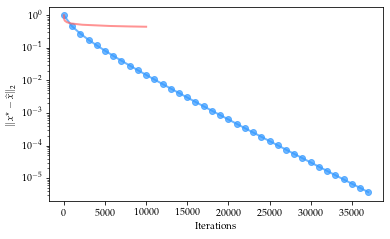

In [6]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

eta = 1/L
# eta decreasing

x_GD, x_list_GD, f_list_GD = GD(y, A, eta, iters, epsilon, True, x_star)
iters = 10000
x_SGD, x_list_SGD, f_list_SGD = SGD(y, A, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(0, len(x_list_GD)*n, n)
xs_SGD = range(len(x_list_SGD))
plt.plot(xs_GD, x_list_GD, '-o', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_SGD, x_list_SGD, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)

plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

### Logistic regression

In [7]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from numpy import linalg as la

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [8]:
# Returns the value of the objecive function
def f(x, y, A, l):
    f_val = 0
    n, p = np.shape(A)
    
    for i in range(n):
        a = A[i, :]
        f_val += (1/n) * np.log(1 + np.exp(-y[i] * a.dot(x))) 
    f_val += l * la.norm(x)**2
    
    return f_val

In [9]:
def GD_logistic(y, A, l, x_new, eta, iters, epsilon, verbose):
    n, p = np.shape(A)
        
    f_list = [f(x_new, y, A, l)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = np.zeros(p)
        for j in range(n):
            a = A[j, :]
            grad += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_old)))) * a.T
        grad += 2 * l * x_old
    
        # Perform gradient step
        x_new = x_old - eta * grad    
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        f_list.append(f(x_new, y, A, l))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)) + ", f(x_new) = " + str(f(x_new, y, A, l)))
    
    print("Number of steps:", len(f_list))
    return x_new, f_list

In [10]:
def SGD_logistic(y, A, l, x_new, eta, iters, epsilon, verbose):
    n, p = np.shape(A)
        
    f_list = [f(x_new, y, A, l)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = np.zeros(p)
        
        J = np.random.randint(n, size = 50)
        for j in J:
            a = A[j, :]
            grad += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_old)))) * a.T
        grad += 2 * l * x_old
    
        # Perform gradient step
        x_new = x_old - eta * grad    
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        f_list.append(f(x_new, y, A, l))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)) + ", f(x_new) = " + str(f(x_new, y, A, l)))
    
    print("Number of steps:", len(f_list))
    return x_new, f_list

iter# = 0, ||x_new - x_old||_2 = 1.6533708799138735, f(x_new) = 98.23621620067647
iter# = 1, ||x_new - x_old||_2 = 1.570673779824443, f(x_new) = 88.61495112580168
iter# = 2, ||x_new - x_old||_2 = 1.492108093800675, f(x_new) = 79.932147640427
iter# = 3, ||x_new - x_old||_2 = 1.417466835268743, f(x_new) = 72.096330764669
iter# = 4, ||x_new - x_old||_2 = 1.346553322919617, f(x_new) = 65.02494587104734
iter# = 5, ||x_new - x_old||_2 = 1.2791806608839118, f(x_new) = 58.643488986403504
iter# = 6, ||x_new - x_old||_2 = 1.2151712437707467, f(x_new) = 52.88472190154184
iter# = 7, ||x_new - x_old||_2 = 1.1543562850318507, f(x_new) = 47.68796382642892
iter# = 8, ||x_new - x_old||_2 = 1.0965753672791259, f(x_new) = 42.99845213304821
iter# = 9, ||x_new - x_old||_2 = 1.0416760134056426, f(x_new) = 38.76676545262423
iter# = 10, ||x_new - x_old||_2 = 0.9895132775462014, f(x_new) = 34.948303047582485
iter# = 11, ||x_new - x_old||_2 = 0.9399493549733552, f(x_new) = 31.50281496942907
iter# = 12, ||x_new 

iter# = 97, ||x_new - x_old||_2 = 0.0009698599934766695, f(x_new) = 0.6658663445461941
iter# = 98, ||x_new - x_old||_2 = 0.000883672013952147, f(x_new) = 0.6658633596383414
iter# = 99, ||x_new - x_old||_2 = 0.0008052863344252732, f(x_new) = 0.6658608805875257
Number of steps: 101
iter# = 0, ||x_new - x_old||_2 = 1.5556654731210375, f(x_new) = 98.85623323573766
iter# = 1, ||x_new - x_old||_2 = 1.477859624876623, f(x_new) = 89.76580149010569
iter# = 2, ||x_new - x_old||_2 = 1.4042526042625294, f(x_new) = 81.53294193822515
iter# = 3, ||x_new - x_old||_2 = 1.33370492665617, f(x_new) = 74.07902640703344
iter# = 4, ||x_new - x_old||_2 = 1.2670828447911426, f(x_new) = 67.3270824746238
iter# = 5, ||x_new - x_old||_2 = 1.2036620959717448, f(x_new) = 61.210665966604324
iter# = 6, ||x_new - x_old||_2 = 1.1437841393585286, f(x_new) = 55.667138965368004
iter# = 7, ||x_new - x_old||_2 = 1.0864013555247463, f(x_new) = 50.64413781574645
iter# = 8, ||x_new - x_old||_2 = 1.0320464145125512, f(x_new) = 4

iter# = 95, ||x_new - x_old||_2 = 0.012220371237490996, f(x_new) = 0.7020497784122401
iter# = 96, ||x_new - x_old||_2 = 0.011678288637743376, f(x_new) = 0.7010247743817524
iter# = 97, ||x_new - x_old||_2 = 0.011126471904904386, f(x_new) = 0.7001076348149488
iter# = 98, ||x_new - x_old||_2 = 0.0106439126955545, f(x_new) = 0.6993024948928714
iter# = 99, ||x_new - x_old||_2 = 0.00995747853959008, f(x_new) = 0.6985937968871725
Number of steps: 101


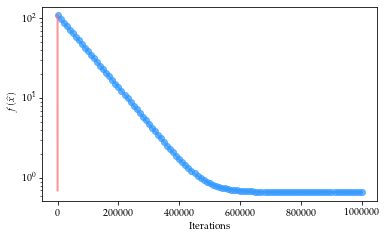

In [11]:
# Run algorithm
epsilon = 1e-3                # Precision parameter
iters = 100
eta = 0.25
verbose = 1
l = 0.1

n = 10000
p = 1000

y = 2*np.random.randint(0,2,size=n)-1   
A = np.random.randn(n, p)
x_init = np.random.randn(p)

x_GD, f_list_GD = GD_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)
x_SGD, f_list_SGD = SGD_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(0, len(f_list_GD)*n, n)
xs_SGD = range(len(f_list_SGD))
plt.plot(xs_GD, f_list_GD, '-o', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_SGD, f_list_SGD, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$f(\widehat{x})$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

### SVRG 

In [12]:
def SVRG_logistic(y, A, l, x_new, eta, iters, epsilon, verbose):
    n, p = np.shape(A)
        
    f_list = [f(x_new, y, A, l)]

    inner_iters = iters//100
    
    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad_full = np.zeros(p)
        for j in range(n):
            a = A[j, :]
            grad_full += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_old)))) * a.T
        grad_full += 2 * l * x_old
        
        x_tilde = x_old

        for q in range(inner_iters):
        
            grad_1 = np.zeros(p)
            grad_2 = np.zeros(p)
            
            J = np.random.randint(n, size = 50)
            for j in J:
                a = A[j, :]
                grad_1 += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_tilde)))) * a.T
                grad_2 += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_old)))) * a.T
            grad_1 += 2 * l * x_tilde
            grad_2 += 2 * l * x_old
    
            # Perform gradient step
            x_tilde = x_tilde - eta * (grad_1 - (grad_2 - grad_full))    
        
        x_new = x_tilde
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        f_list.append(f(x_new, y, A, l))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_star||_2 = " + str(la.norm(x_new - x_old, 2)) + ", f(x_new) = " + str(f(x_new, y, A, l)))
    
    print("Number of steps:", len(f_list))
    return x_new, f_list

In [ ]:
# Run algorithm
epsilon = 5e-3                # Precision parameter
iters = 1000
verbose = 1
l = 0.1

n = 1000
p = 1000

y = 2*np.random.randint(0,2,size=n)-1   

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 50, p)
S = np.diag(S)
A = U.dot(S.dot(V.T))
print(la.cond(A))

# Compute largest singular value of A
U,S,V = la.svd(A)
L = max(S)**2
mu = min(S)**2

eta = 0.1

x_init = np.random.randn(p)

x_GD, f_list_GD = GD_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)
x_SGD, f_list_SGD = SGD_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)
eta = 0.1
x_SVRG, f_list_SVRG = SVRG_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(0, len(f_list_GD)*n, n)
xs_SGD = range(0, len(f_list_SGD)*50, 50)
xs_SVRG = range(0, len(f_list_SVRG)*2*n, 2*n)

plt.plot(xs_GD, f_list_GD, '-o', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_SGD, f_list_SGD, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_SVRG, f_list_SVRG, '-', color = '#669900', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$f(\widehat{x})$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

50.000000000000085
iter# = 0, ||x_new - x_old||_2 = 0.6667892235713464, f(x_new) = 105.5423442263771
iter# = 1, ||x_new - x_old||_2 = 0.6534328048759508, f(x_new) = 101.31536795100476
iter# = 2, ||x_new - x_old||_2 = 0.6403423125112571, f(x_new) = 97.2560621079921
iter# = 3, ||x_new - x_old||_2 = 0.627512396662143, f(x_new) = 93.35779679801766
iter# = 4, ||x_new - x_old||_2 = 0.6149378128142887, f(x_new) = 89.61420456544707
iter# = 5, ||x_new - x_old||_2 = 0.6026134200727399, f(x_new) = 86.0191700050541
iter# = 6, ||x_new - x_old||_2 = 0.5905341820265789, f(x_new) = 82.56681973914533
iter# = 7, ||x_new - x_old||_2 = 0.5786951696175312, f(x_new) = 79.25151273550594
iter# = 8, ||x_new - x_old||_2 = 0.5670915643174724, f(x_new) = 76.0678309608659
iter# = 9, ||x_new - x_old||_2 = 0.5557186592547506, f(x_new) = 73.0105703899282
iter# = 10, ||x_new - x_old||_2 = 0.544571856285387, f(x_new) = 70.07473240427665
iter# = 11, ||x_new - x_old||_2 = 0.5336466584561808, f(x_new) = 67.25551561007374


iter# = 103, ||x_new - x_old||_2 = 0.0737647584767098, f(x_new) = 1.5024403815309295
iter# = 104, ||x_new - x_old||_2 = 0.07196541058015606, f(x_new) = 1.451284476942373
iter# = 105, ||x_new - x_old||_2 = 0.07020196281836456, f(x_new) = 1.4026076720834195
iter# = 106, ||x_new - x_old||_2 = 0.06847387519984045, f(x_new) = 1.3563004545434036
iter# = 107, ||x_new - x_old||_2 = 0.06678065030361513, f(x_new) = 1.312257592770041
iter# = 108, ||x_new - x_old||_2 = 0.0651218333039643, f(x_new) = 1.2703779425635575
iter# = 109, ||x_new - x_old||_2 = 0.06349701064290611, f(x_new) = 1.2305642658610945
iter# = 110, ||x_new - x_old||_2 = 0.06190580740509688, f(x_new) = 1.192723062592854
iter# = 111, ||x_new - x_old||_2 = 0.06034788349722407, f(x_new) = 1.1567644160141846
iter# = 112, ||x_new - x_old||_2 = 0.058822928779145287, f(x_new) = 1.122601851535986
iter# = 113, ||x_new - x_old||_2 = 0.05733065734278156, f(x_new) = 1.090152208694868
iter# = 114, ||x_new - x_old||_2 = 0.05587080118438674, f(x_

iter# = 200, ||x_new - x_old||_2 = 0.006348612043906131, f(x_new) = 0.49068061785950295
iter# = 201, ||x_new - x_old||_2 = 0.006200311818546535, f(x_new) = 0.4903006646528921
iter# = 202, ||x_new - x_old||_2 = 0.006055681380905107, f(x_new) = 0.489938224493542
iter# = 203, ||x_new - x_old||_2 = 0.005914623093358635, f(x_new) = 0.489592467024553
iter# = 204, ||x_new - x_old||_2 = 0.005777042095004721, f(x_new) = 0.48926260255340837
iter# = 205, ||x_new - x_old||_2 = 0.005642846221479943, f(x_new) = 0.48894787999232303
iter# = 206, ||x_new - x_old||_2 = 0.005511945926882003, f(x_new) = 0.48864758490610233
iter# = 207, ||x_new - x_old||_2 = 0.005384254207745924, f(x_new) = 0.48836103766177497
Number of steps: 209
iter# = 0, ||x_new - x_old||_2 = 0.6304241863019182, f(x_new) = 105.79732286829181
iter# = 1, ||x_new - x_old||_2 = 0.6181327854683676, f(x_new) = 101.808992370637
iter# = 2, ||x_new - x_old||_2 = 0.6054645088342494, f(x_new) = 97.9766568473926
iter# = 3, ||x_new - x_old||_2 = 0.

iter# = 100, ||x_new - x_old||_2 = 0.08440247665339021, f(x_new) = 3.130484790567678
iter# = 101, ||x_new - x_old||_2 = 0.08231291612736927, f(x_new) = 3.0401887045417397
iter# = 102, ||x_new - x_old||_2 = 0.08123117072672706, f(x_new) = 2.9527422781259896
iter# = 103, ||x_new - x_old||_2 = 0.07958040457745419, f(x_new) = 2.868270753341875
iter# = 104, ||x_new - x_old||_2 = 0.0782417591189374, f(x_new) = 2.786561130436454
iter# = 105, ||x_new - x_old||_2 = 0.07684632331828345, f(x_new) = 2.707462066672999
iter# = 106, ||x_new - x_old||_2 = 0.07462557804868641, f(x_new) = 2.6317567468960474
iter# = 107, ||x_new - x_old||_2 = 0.07355238591740966, f(x_new) = 2.558589525171727
iter# = 108, ||x_new - x_old||_2 = 0.07218946129457719, f(x_new) = 2.4879629561702323
iter# = 109, ||x_new - x_old||_2 = 0.07080467780490748, f(x_new) = 2.4198913043909984
iter# = 110, ||x_new - x_old||_2 = 0.06879690864894353, f(x_new) = 2.3545295359720577
iter# = 111, ||x_new - x_old||_2 = 0.06737702318464629, f(x_

iter# = 209, ||x_new - x_old||_2 = 0.013341495521199282, f(x_new) = 0.6777738342019225
iter# = 210, ||x_new - x_old||_2 = 0.014897451306383078, f(x_new) = 0.6762136315311561
iter# = 211, ||x_new - x_old||_2 = 0.012949349658744929, f(x_new) = 0.6749136665572842
iter# = 212, ||x_new - x_old||_2 = 0.013725403188853146, f(x_new) = 0.6735867310664786
iter# = 213, ||x_new - x_old||_2 = 0.012732851830283734, f(x_new) = 0.6724786038948501
iter# = 214, ||x_new - x_old||_2 = 0.012599959466877097, f(x_new) = 0.6713085082359854
iter# = 215, ||x_new - x_old||_2 = 0.012862086018967897, f(x_new) = 0.670215917414736
iter# = 216, ||x_new - x_old||_2 = 0.012479639033952748, f(x_new) = 0.6693341407110671
iter# = 217, ||x_new - x_old||_2 = 0.012275862165385414, f(x_new) = 0.6685009172197938
iter# = 218, ||x_new - x_old||_2 = 0.012096387496221524, f(x_new) = 0.6677237020750935
iter# = 219, ||x_new - x_old||_2 = 0.012805823682787942, f(x_new) = 0.6667497442491134
iter# = 220, ||x_new - x_old||_2 = 0.0118469

iter# = 309, ||x_new - x_old||_2 = 0.009689293342365988, f(x_new) = 0.6495321545692219
iter# = 310, ||x_new - x_old||_2 = 0.00943249714052615, f(x_new) = 0.6494009067881223
iter# = 311, ||x_new - x_old||_2 = 0.009903865770766521, f(x_new) = 0.6493949590214647
iter# = 312, ||x_new - x_old||_2 = 0.01005666931308645, f(x_new) = 0.6495779383850312
iter# = 313, ||x_new - x_old||_2 = 0.010050760580373881, f(x_new) = 0.6496766048007223
iter# = 314, ||x_new - x_old||_2 = 0.010115289251300915, f(x_new) = 0.6498217259668057
iter# = 315, ||x_new - x_old||_2 = 0.010002599485985357, f(x_new) = 0.6497389445146565
iter# = 316, ||x_new - x_old||_2 = 0.009924760229560714, f(x_new) = 0.6496876047028807
iter# = 317, ||x_new - x_old||_2 = 0.009988539166495938, f(x_new) = 0.6496333823666096
iter# = 318, ||x_new - x_old||_2 = 0.00998024394771032, f(x_new) = 0.649683617648276
iter# = 319, ||x_new - x_old||_2 = 0.00976112918144132, f(x_new) = 0.6494837672910785
iter# = 320, ||x_new - x_old||_2 = 0.01010145412

iter# = 407, ||x_new - x_old||_2 = 0.009651094013248223, f(x_new) = 0.6499124362000871
iter# = 408, ||x_new - x_old||_2 = 0.010200080478024134, f(x_new) = 0.6498676785186531
iter# = 409, ||x_new - x_old||_2 = 0.01014366753270585, f(x_new) = 0.6498128369671846
iter# = 410, ||x_new - x_old||_2 = 0.009740006159023798, f(x_new) = 0.6498601528724679
iter# = 411, ||x_new - x_old||_2 = 0.010163393587089412, f(x_new) = 0.6500007997359811
iter# = 412, ||x_new - x_old||_2 = 0.009795760540616715, f(x_new) = 0.6500561653968486
iter# = 413, ||x_new - x_old||_2 = 0.009846310854626747, f(x_new) = 0.6497809850419971
iter# = 414, ||x_new - x_old||_2 = 0.00953311693497512, f(x_new) = 0.6499140949700479
iter# = 415, ||x_new - x_old||_2 = 0.009855912027790011, f(x_new) = 0.649813477661448
iter# = 416, ||x_new - x_old||_2 = 0.00959627200806359, f(x_new) = 0.6496939994408264
iter# = 417, ||x_new - x_old||_2 = 0.010117295826736832, f(x_new) = 0.6495354378821148
iter# = 418, ||x_new - x_old||_2 = 0.0095276271

iter# = 510, ||x_new - x_old||_2 = 0.01004410139217176, f(x_new) = 0.6491405108270996
iter# = 511, ||x_new - x_old||_2 = 0.010647335671117588, f(x_new) = 0.649190293439933
iter# = 512, ||x_new - x_old||_2 = 0.00970540948846092, f(x_new) = 0.6490985445058967
iter# = 513, ||x_new - x_old||_2 = 0.009610668220801316, f(x_new) = 0.6491147902518615
iter# = 514, ||x_new - x_old||_2 = 0.01023193654374568, f(x_new) = 0.649031316542302
iter# = 515, ||x_new - x_old||_2 = 0.009519982538147995, f(x_new) = 0.6490947940114709
iter# = 516, ||x_new - x_old||_2 = 0.00948791959291398, f(x_new) = 0.6491462878979665
iter# = 517, ||x_new - x_old||_2 = 0.009815530408162592, f(x_new) = 0.6491517034325096
iter# = 518, ||x_new - x_old||_2 = 0.009802639200708162, f(x_new) = 0.6487698039607751
iter# = 519, ||x_new - x_old||_2 = 0.00982640953044395, f(x_new) = 0.6489688868236206
iter# = 520, ||x_new - x_old||_2 = 0.009788693167173122, f(x_new) = 0.6488780241786976
iter# = 521, ||x_new - x_old||_2 = 0.0099897455299

iter# = 611, ||x_new - x_old||_2 = 0.010834867612963334, f(x_new) = 0.6490690372445699
iter# = 612, ||x_new - x_old||_2 = 0.009436897733695339, f(x_new) = 0.6490670526581603
iter# = 613, ||x_new - x_old||_2 = 0.009653224077296924, f(x_new) = 0.6488914730983938
iter# = 614, ||x_new - x_old||_2 = 0.009483247274956003, f(x_new) = 0.6488897298982016
iter# = 615, ||x_new - x_old||_2 = 0.009851128348272554, f(x_new) = 0.6488299499401768
iter# = 616, ||x_new - x_old||_2 = 0.009575647789777883, f(x_new) = 0.6489035699863562
iter# = 617, ||x_new - x_old||_2 = 0.010035197241160986, f(x_new) = 0.6490495940283124
iter# = 618, ||x_new - x_old||_2 = 0.01013698976865444, f(x_new) = 0.6489104720682809
iter# = 619, ||x_new - x_old||_2 = 0.009830272208832912, f(x_new) = 0.6489314078416827
iter# = 620, ||x_new - x_old||_2 = 0.009521146514703791, f(x_new) = 0.6488104835844013
iter# = 621, ||x_new - x_old||_2 = 0.00946923240282989, f(x_new) = 0.6488303702544882
iter# = 622, ||x_new - x_old||_2 = 0.00971034

iter# = 709, ||x_new - x_old||_2 = 0.010769060245746412, f(x_new) = 0.6500480834567892
iter# = 710, ||x_new - x_old||_2 = 0.01007482398147427, f(x_new) = 0.6501530079126948
iter# = 711, ||x_new - x_old||_2 = 0.010798836908102245, f(x_new) = 0.6501337341483757
iter# = 712, ||x_new - x_old||_2 = 0.009787775011263133, f(x_new) = 0.6501242417254263
iter# = 713, ||x_new - x_old||_2 = 0.009836228789477949, f(x_new) = 0.6500476296396379
iter# = 714, ||x_new - x_old||_2 = 0.009990820334150982, f(x_new) = 0.649984938706713
iter# = 715, ||x_new - x_old||_2 = 0.009675897062758015, f(x_new) = 0.6501792923780647
iter# = 716, ||x_new - x_old||_2 = 0.009727042297726514, f(x_new) = 0.6500926728324067
iter# = 717, ||x_new - x_old||_2 = 0.00976051816874486, f(x_new) = 0.650097400042098
iter# = 718, ||x_new - x_old||_2 = 0.010731962943912902, f(x_new) = 0.6500515479156309
iter# = 719, ||x_new - x_old||_2 = 0.009741686117273914, f(x_new) = 0.6498799224002586
iter# = 720, ||x_new - x_old||_2 = 0.0104482735

iter# = 810, ||x_new - x_old||_2 = 0.010145463676765115, f(x_new) = 0.6498966555293104
iter# = 811, ||x_new - x_old||_2 = 0.009782533374152141, f(x_new) = 0.6500655672273101
iter# = 812, ||x_new - x_old||_2 = 0.009215460798016302, f(x_new) = 0.6500113190891444
iter# = 813, ||x_new - x_old||_2 = 0.009554910625025939, f(x_new) = 0.6500696934263406
iter# = 814, ||x_new - x_old||_2 = 0.010114205852639422, f(x_new) = 0.6502971583429968
iter# = 815, ||x_new - x_old||_2 = 0.009424569793544382, f(x_new) = 0.6502443617016018
iter# = 816, ||x_new - x_old||_2 = 0.009893342148642978, f(x_new) = 0.650245227111693
iter# = 817, ||x_new - x_old||_2 = 0.009605578324450149, f(x_new) = 0.6501517097750641
iter# = 818, ||x_new - x_old||_2 = 0.009971465025737737, f(x_new) = 0.6501047295334883
iter# = 819, ||x_new - x_old||_2 = 0.010020293949498398, f(x_new) = 0.6503459252628306
iter# = 820, ||x_new - x_old||_2 = 0.009752595643601454, f(x_new) = 0.6502239047575384
iter# = 821, ||x_new - x_old||_2 = 0.0098297

iter# = 913, ||x_new - x_old||_2 = 0.00969937272749141, f(x_new) = 0.6502147267001142
iter# = 914, ||x_new - x_old||_2 = 0.00933134385832668, f(x_new) = 0.6500546631834899
iter# = 915, ||x_new - x_old||_2 = 0.009531281137842754, f(x_new) = 0.6501028361796015
iter# = 916, ||x_new - x_old||_2 = 0.009504969630690854, f(x_new) = 0.6501361328561472
iter# = 917, ||x_new - x_old||_2 = 0.009505996662812153, f(x_new) = 0.6500803759126362
iter# = 918, ||x_new - x_old||_2 = 0.010370117346448545, f(x_new) = 0.6501183417172279
iter# = 919, ||x_new - x_old||_2 = 0.0095634049135396, f(x_new) = 0.6500982537091137
iter# = 920, ||x_new - x_old||_2 = 0.009814626706011829, f(x_new) = 0.6501502636587777
iter# = 921, ||x_new - x_old||_2 = 0.010145961819786295, f(x_new) = 0.650279881338965
iter# = 922, ||x_new - x_old||_2 = 0.009913106059488835, f(x_new) = 0.6503388206523063
iter# = 923, ||x_new - x_old||_2 = 0.010673410117835057, f(x_new) = 0.6504065241539613
iter# = 924, ||x_new - x_old||_2 = 0.00925969820